#**Step 1: Data Importing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Employee-Attrition.csv')

In [ ]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [ ]:
def info(dataframe):
  print(100 * "_")
  print('DIMENSION: ({}, {})'.format(dataframe.shape[0], dataframe.shape[1]))
  print(100 * "_")
  print("COLUMNS:\n")
  print(dataframe.columns.values)
  print(100 * "_")
  print("DATA INFO:\n")
  print(dataframe.dtypes)
  print(100 * "_")
  print("MISSING VALUES:\n")
  print(dataframe.isnull().sum())
  print(100 * "_")
  print("NUMBER OF UNIQUE VALUES:\n")
  print(dataframe.nunique())
  print(100 * "_")
  print("UNIQUE VALUES:\n")
  columns = [column for column in dataframe.columns if dataframe[column].nunique() <= 10]
  for col in columns:
    print(f"{col}: {dataframe[col].unique()}")
  print(100 * "_")
  print("OCURRENCES:\n")
  columns = [column for column in dataframe.columns if dataframe[column].nunique() <= 10]
  for col in columns:
    print(f"{dataframe[col].value_counts()}")

In [ ]:
info(df)

____________________________________________________________________________________________________
DIMENSION: (1470, 35)
____________________________________________________________________________________________________
COLUMNS:

['Age' 'Attrition' 'BusinessTravel' 'DailyRate' 'Department'
 'DistanceFromHome' 'Education' 'EducationField' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender' 'HourlyRate'
 'JobInvolvement' 'JobLevel' 'JobRole' 'JobSatisfaction' 'MaritalStatus'
 'MonthlyIncome' 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'StandardHours' 'StockOptionLevel' 'TotalWorkingYears'
 'TrainingTimesLastYear' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']
____________________________________________________________________________________________________
DATA INFO:

Age                          int64
Attrition                

#**Step 2: Data Visualization**

In [ ]:
df = df.drop(['EmployeeCount', 'StandardHours', 'DailyRate', 'EducationField', 'StockOptionLevel', 'TrainingTimesLastYear', 'JobLevel', 'JobInvolvement'], axis=1)

In [ ]:
for col in df.columns:
  if df[col].nunique() <= 5 and df[col].nunique() > 3:
    print(f"{col}: {df[col].unique()}")

Education: [2 1 4 3 5]
EnvironmentSatisfaction: [2 3 4 1]
JobSatisfaction: [4 2 3 1]
RelationshipSatisfaction: [1 4 2 3]
WorkLifeBalance: [1 3 2 4]


In [ ]:
col = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction']
for c in col:
  df[c] = df[c].replace({1: 'Low', 2: 'Medium', 3: 'High',4: 'Very High'})

In [ ]:
for col in df.columns:
  if df[col].nunique() <= 5 and df[col].nunique() > 3:
    print(f"{col}: {df[col].unique()}")

Education: [2 1 4 3 5]
EnvironmentSatisfaction: ['Medium' 'High' 'Very High' 'Low']
JobSatisfaction: ['Very High' 'Medium' 'High' 'Low']
RelationshipSatisfaction: ['Low' 'Very High' 'Medium' 'High']
WorkLifeBalance: [1 3 2 4]


In [ ]:
df['Education'] = df['Education'].replace({1: 'Below College', 2: 'College', 3: 'Bachelor',4: 'Master', 5: 'Doctor'})

In [ ]:
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace({1: 'Bad', 2: 'Good', 3: 'Better',4: 'Best'})

In [ ]:
info(df)

____________________________________________________________________________________________________
DIMENSION: (1470, 27)
____________________________________________________________________________________________________
COLUMNS:

['Age' 'Attrition' 'BusinessTravel' 'Department' 'DistanceFromHome'
 'Education' 'EmployeeNumber' 'EnvironmentSatisfaction' 'Gender'
 'HourlyRate' 'JobRole' 'JobSatisfaction' 'MaritalStatus' 'MonthlyIncome'
 'MonthlyRate' 'NumCompaniesWorked' 'Over18' 'OverTime'
 'PercentSalaryHike' 'PerformanceRating' 'RelationshipSatisfaction'
 'TotalWorkingYears' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']
____________________________________________________________________________________________________
DATA INFO:

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education          

In [ ]:
df = df.drop(['Over18', 'PerformanceRating'], axis=1)

In [ ]:
cat_var = [col for col in df.columns if df[col].nunique() < 10]
num_var = [col for col in df.columns if df[col].nunique() > 10]


In [ ]:
num_var

['Age',
 'DistanceFromHome',
 'EmployeeNumber',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:
df = df.drop(['EmployeeNumber', 'HourlyRate', 'MonthlyRate'], axis=1)

In [ ]:
cat_var = [col for col in df.columns if df[col].nunique() < 10]
num_var = [col for col in df.columns if df[col].nunique() > 10]


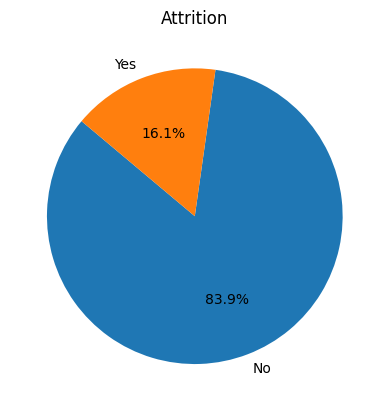

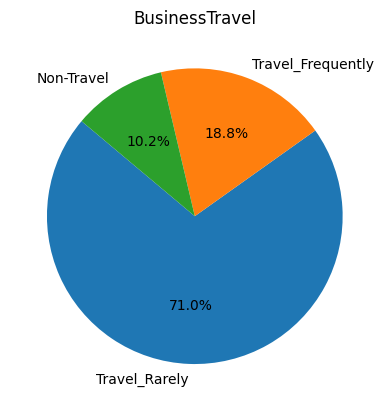

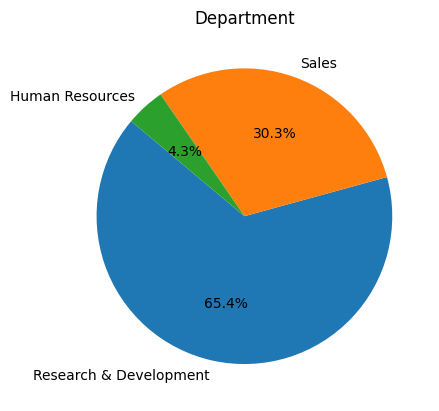

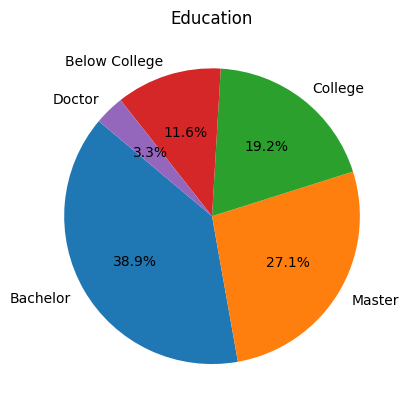

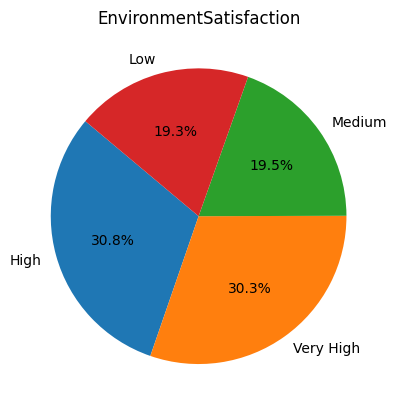

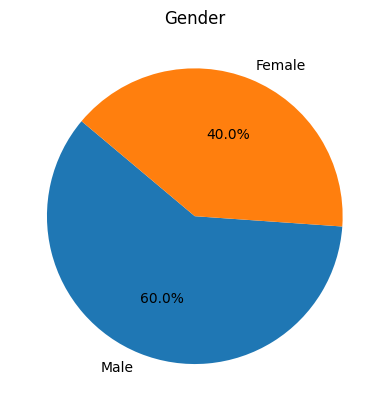

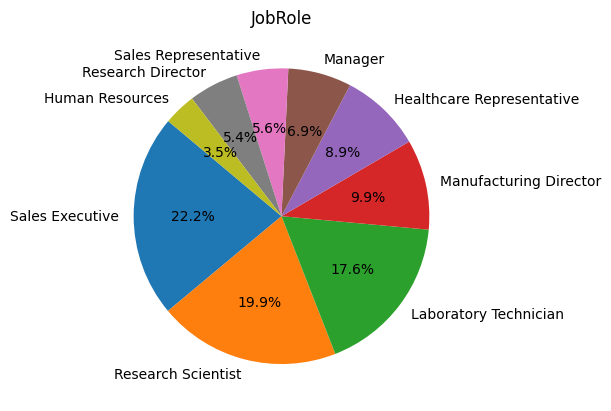

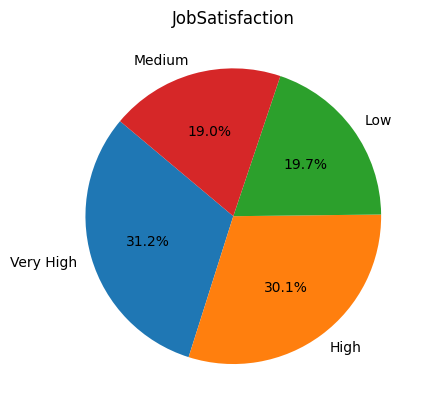

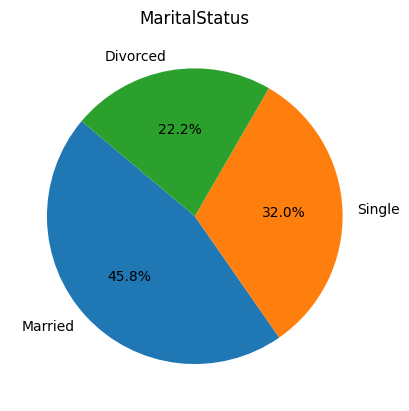

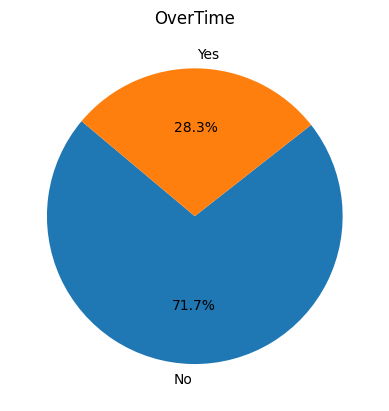

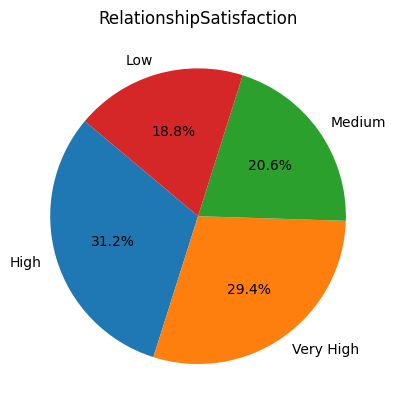

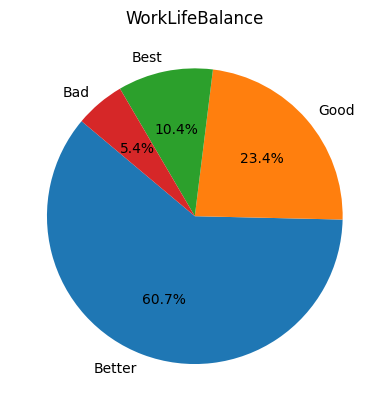

In [ ]:
for col in cat_var:
  value = df[col].value_counts().values
  label = df[col].value_counts().index
  plt.pie(value, labels=label, autopct='%1.1f%%', startangle=140)
  plt.title(col)
  plt.show()
  print()

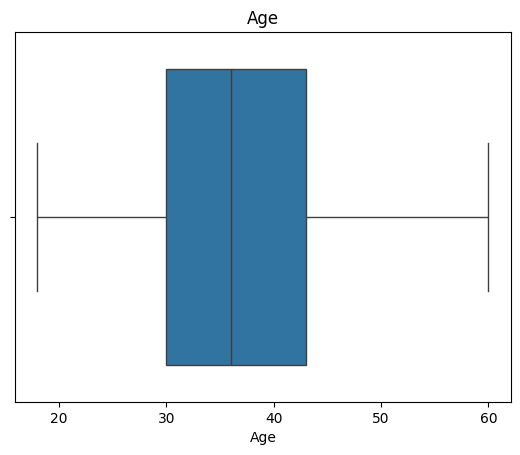

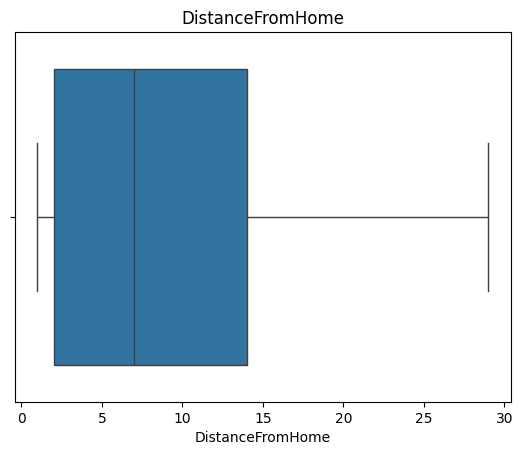

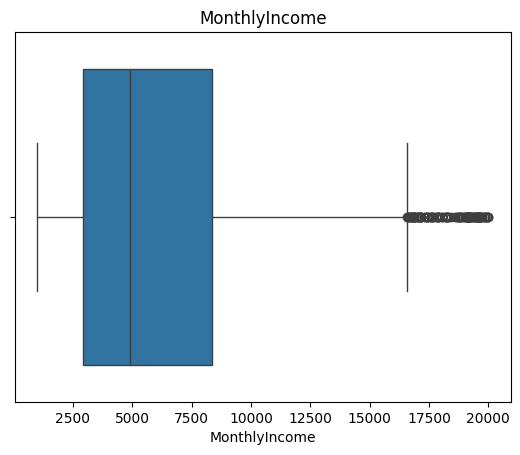

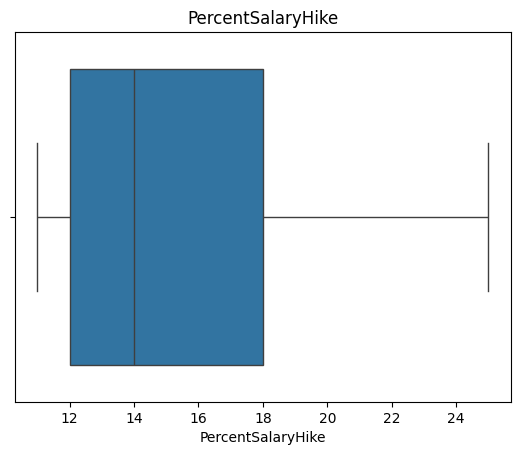

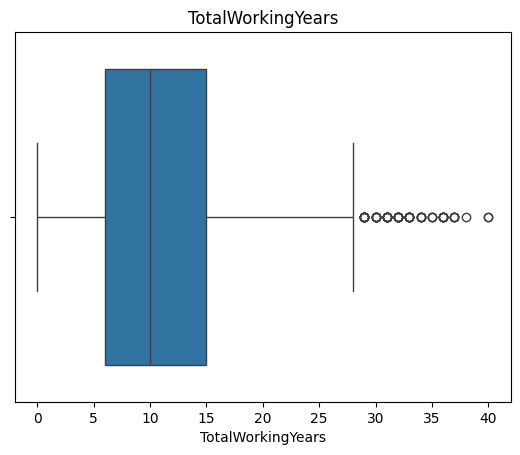

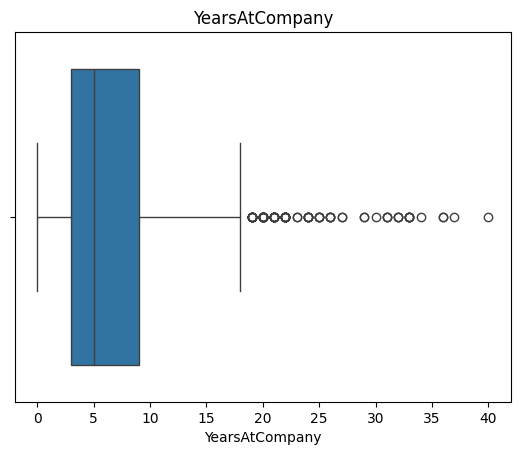

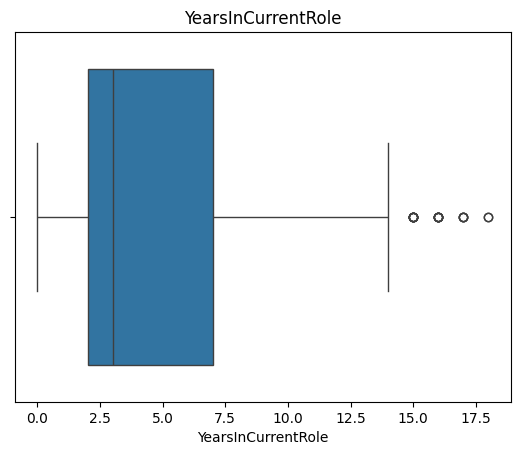

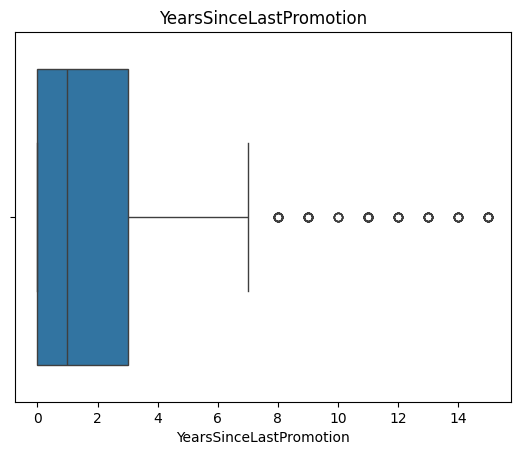

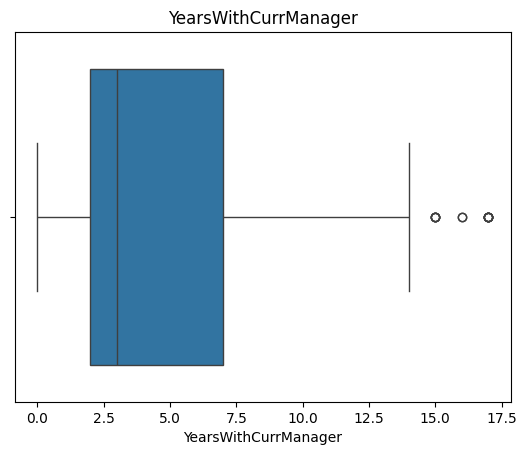

In [ ]:
for col in num_var:
  sns.boxplot(x=df[col])
  plt.title(col)
  plt.show()

In [ ]:
df['Attrition'] = df['Attrition'].replace({'Yes': 1, 'No': 0})

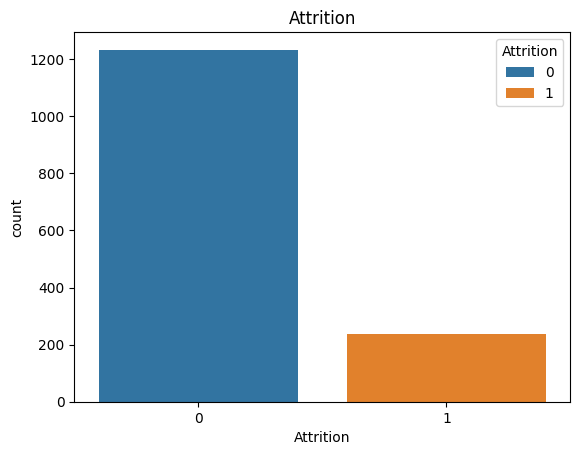

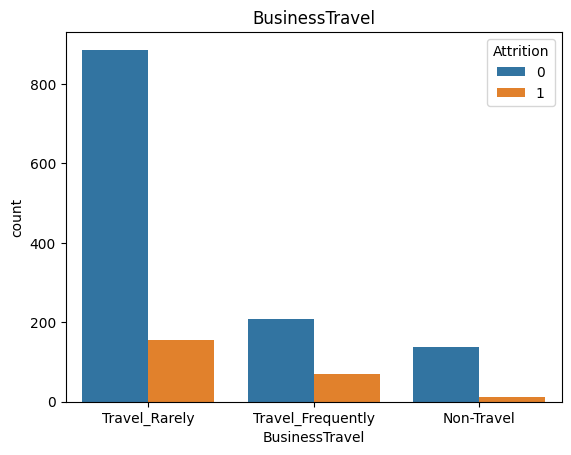

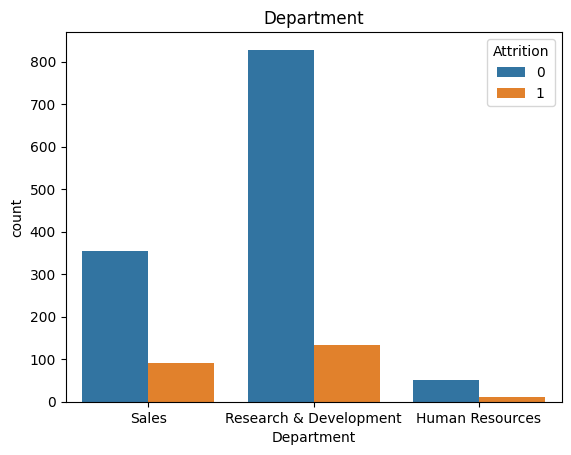

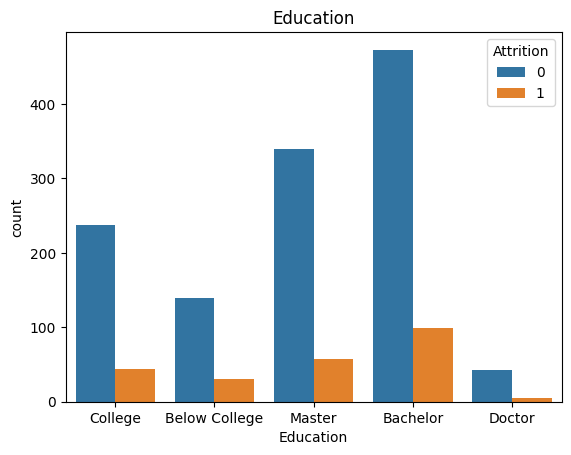

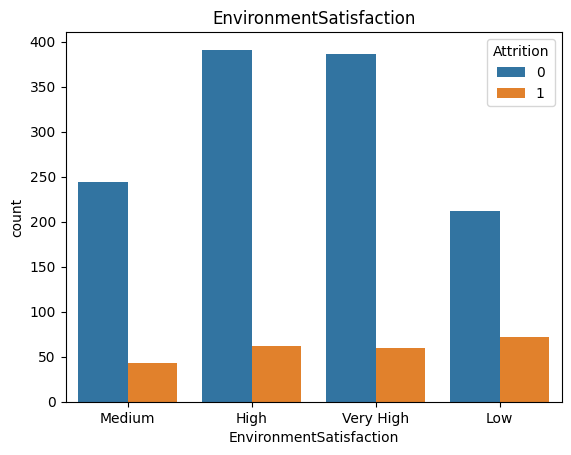

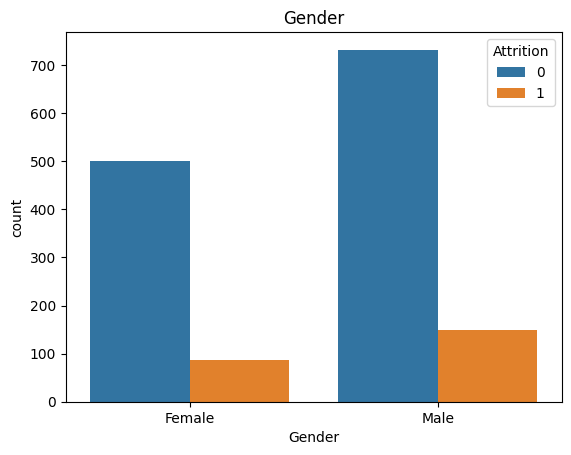

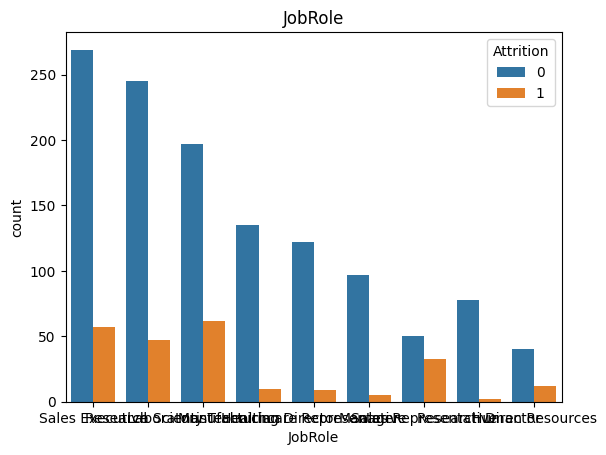

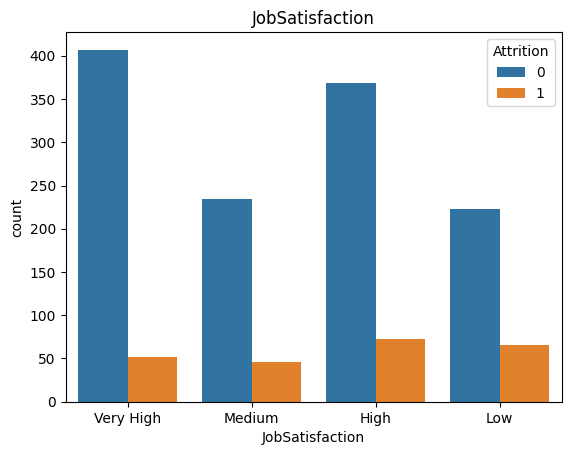

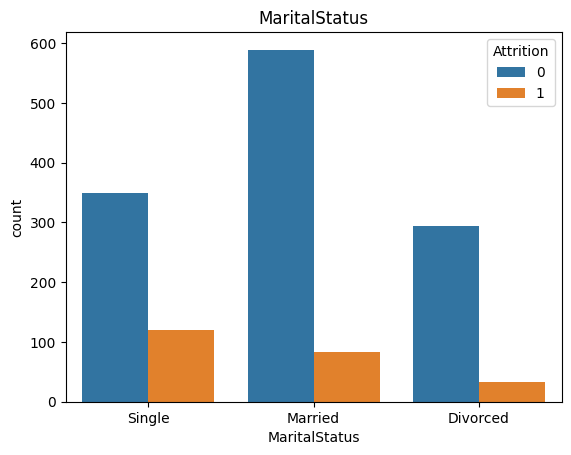

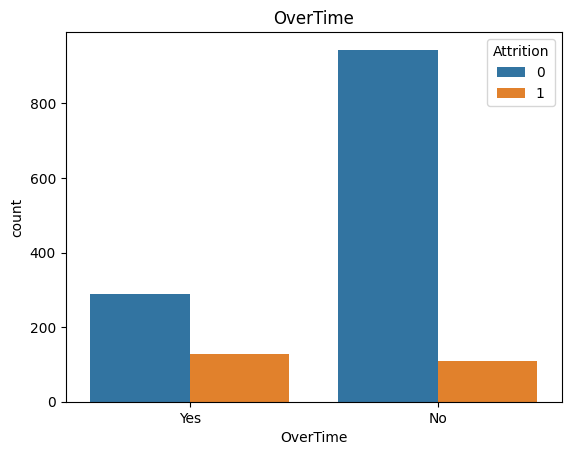

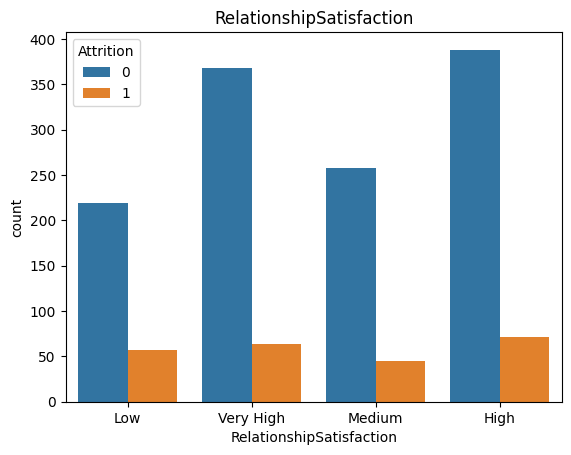

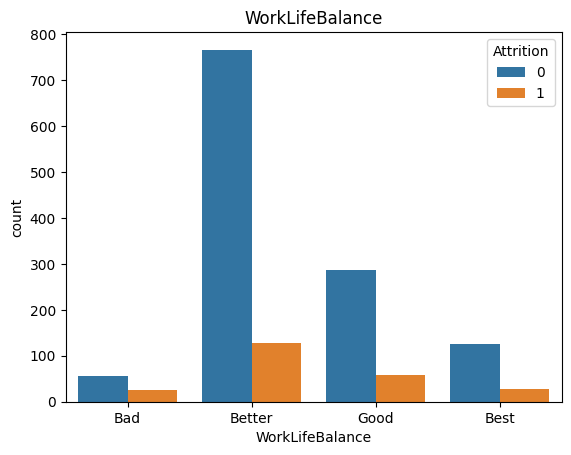

In [ ]:
for col in cat_var:
  sns.countplot(x=df[col], hue=df['Attrition'])
  plt.title(col)
  plt.show()

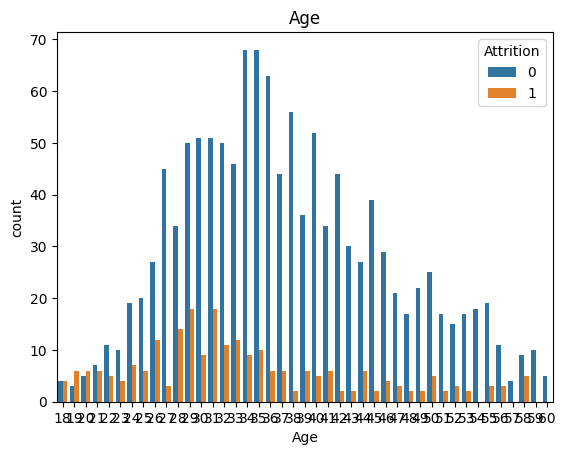

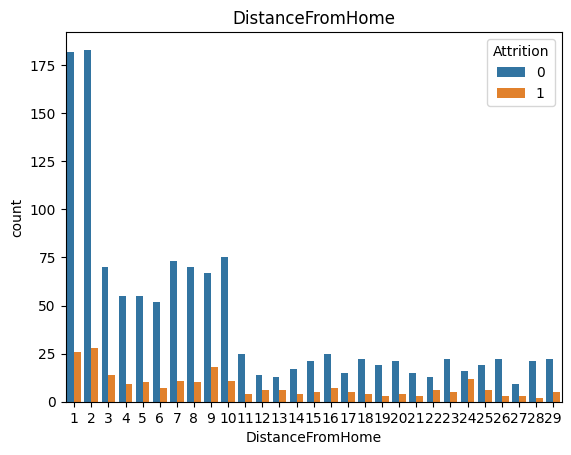

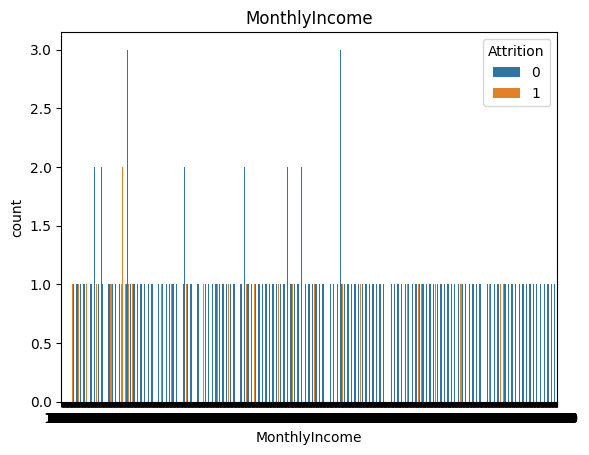

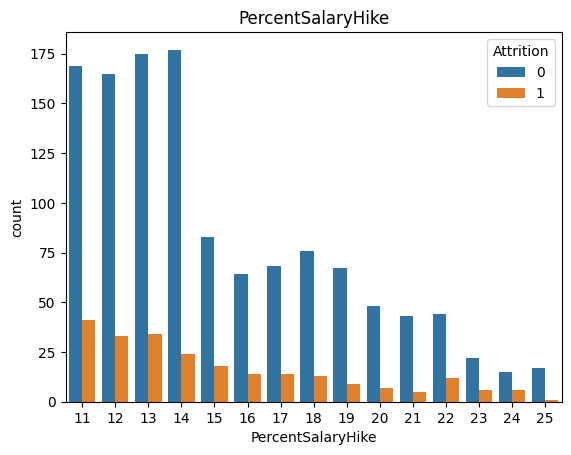

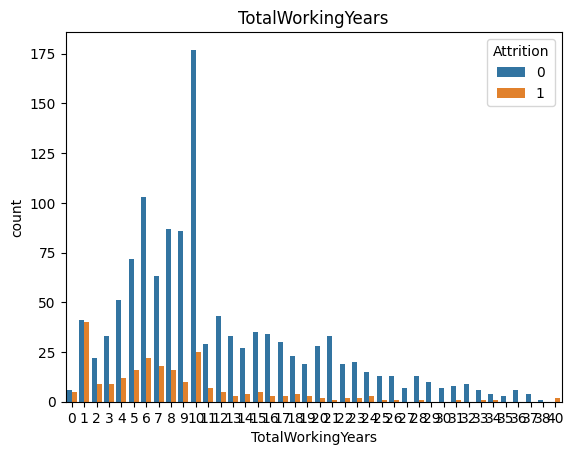

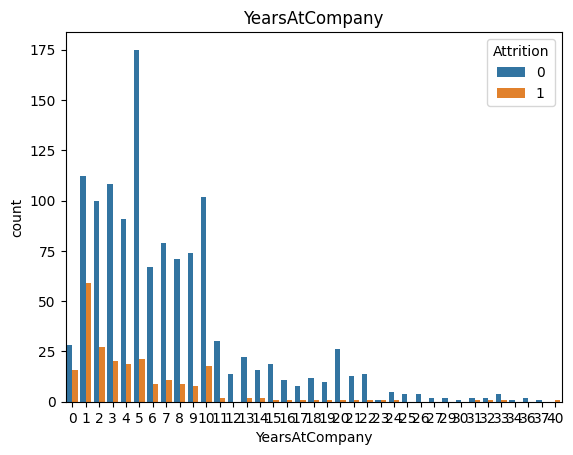

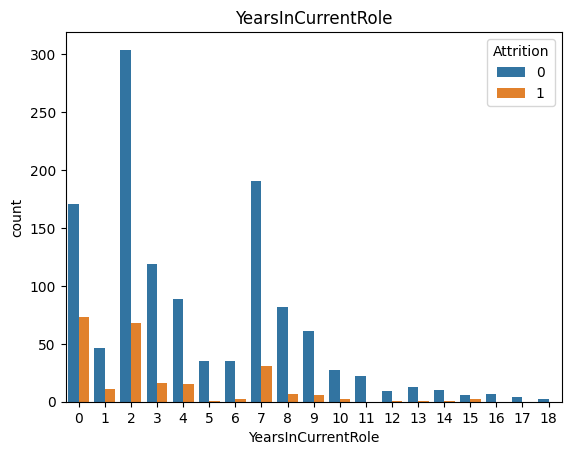

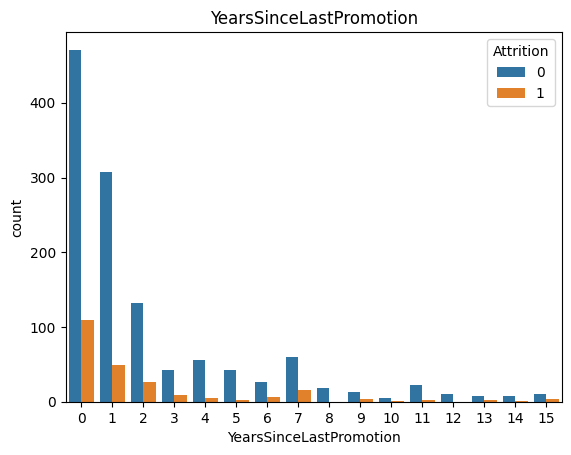

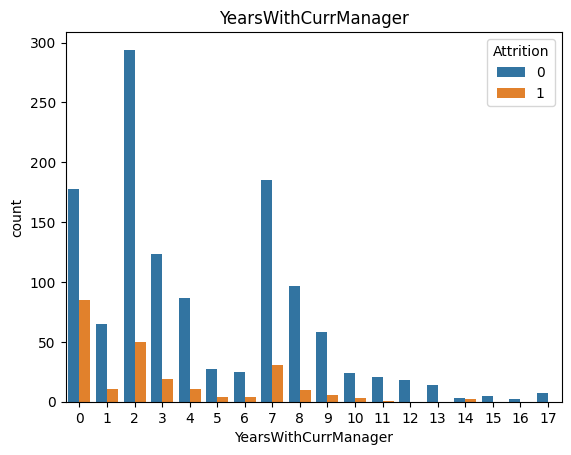

In [ ]:
for col in num_var:
  sns.countplot(x=df[col], hue=df['Attrition'])
  plt.title(col)
  plt.show()

In [ ]:
info(df)

____________________________________________________________________________________________________
DIMENSION: (1470, 22)
____________________________________________________________________________________________________
COLUMNS:

['Age' 'Attrition' 'BusinessTravel' 'Department' 'DistanceFromHome'
 'Education' 'EnvironmentSatisfaction' 'Gender' 'JobRole'
 'JobSatisfaction' 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked'
 'OverTime' 'PercentSalaryHike' 'RelationshipSatisfaction'
 'TotalWorkingYears' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']
____________________________________________________________________________________________________
DATA INFO:

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                   object
EnvironmentSatisfaction     object
Gender                 

In [ ]:
df_true = df[df['Attrition'] == 1]
df_false = df[df['Attrition'] == 0]

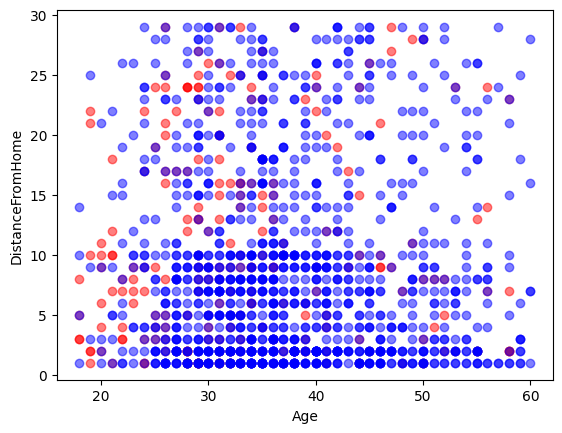

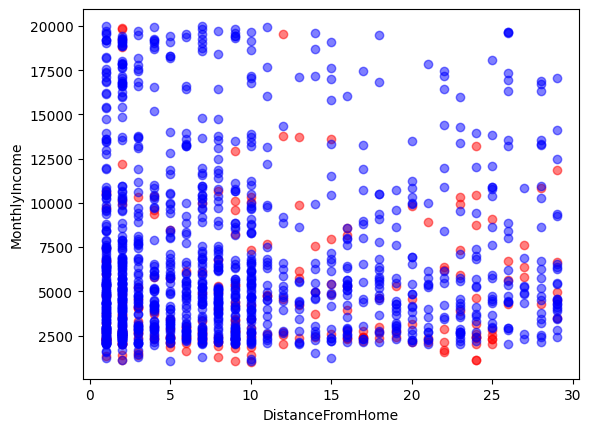

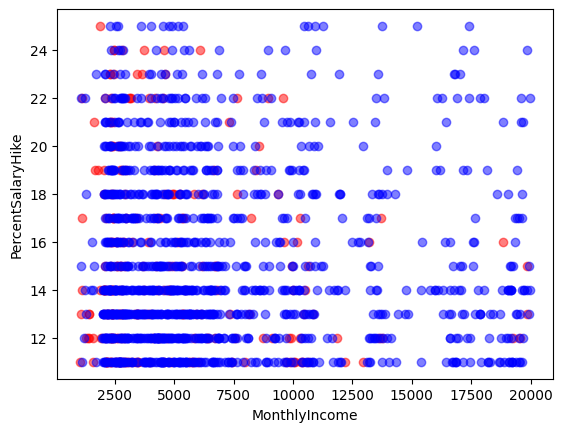

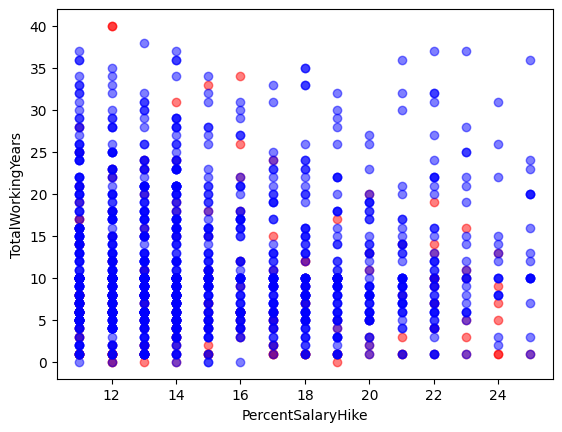

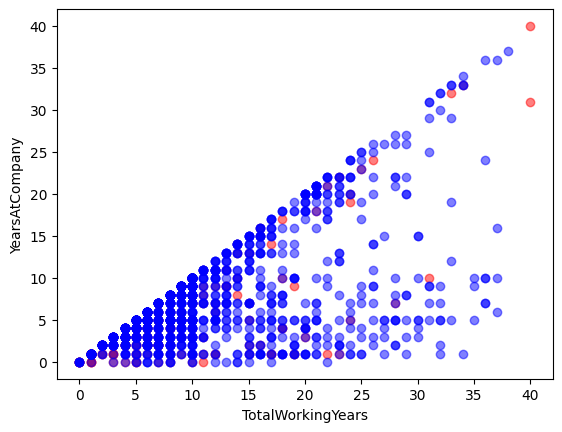

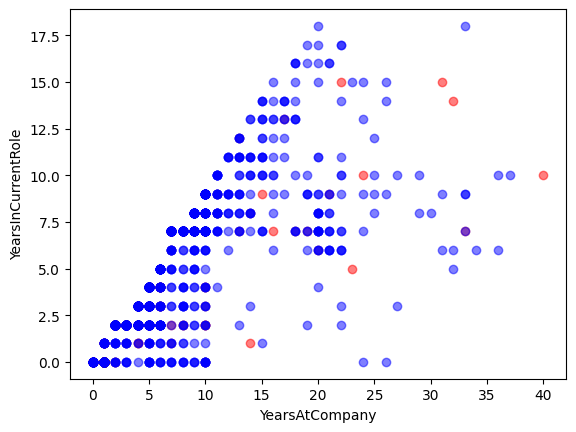

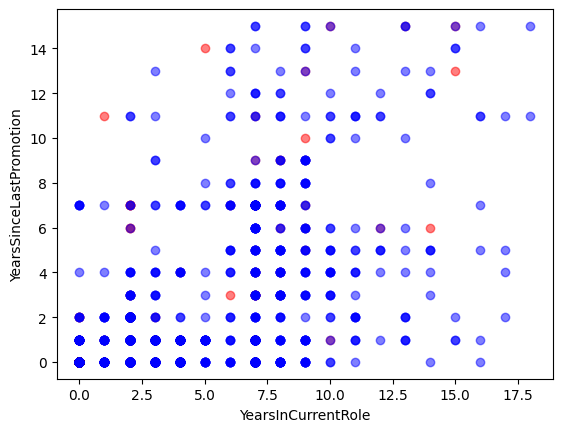

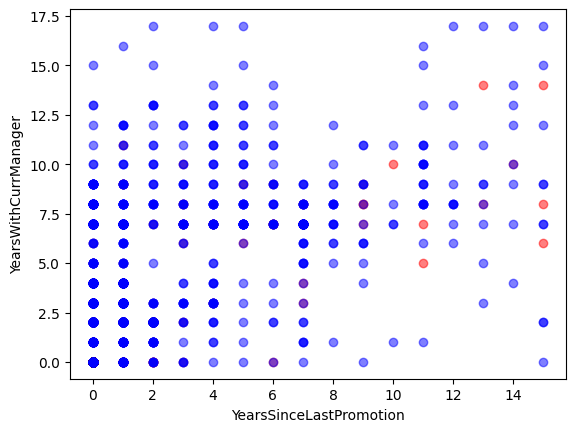

In [ ]:
for i in range(len(num_var) - 1):
  plt.scatter(df_true[num_var[i]], df_true[num_var[i + 1]], color='red', alpha=0.5)
  plt.scatter(df_false[num_var[i]], df_false[num_var[i + 1]], color='blue', alpha=0.5)
  plt.xlabel(num_var[i])
  plt.ylabel(num_var[i + 1])
  plt.show()


#**Step 3: Data Preprocessing**

In [ ]:
info(df)

____________________________________________________________________________________________________
DIMENSION: (1470, 22)
____________________________________________________________________________________________________
COLUMNS:

['Age' 'Attrition' 'BusinessTravel' 'Department' 'DistanceFromHome'
 'Education' 'EnvironmentSatisfaction' 'Gender' 'JobRole'
 'JobSatisfaction' 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked'
 'OverTime' 'PercentSalaryHike' 'RelationshipSatisfaction'
 'TotalWorkingYears' 'WorkLifeBalance' 'YearsAtCompany'
 'YearsInCurrentRole' 'YearsSinceLastPromotion' 'YearsWithCurrManager']
____________________________________________________________________________________________________
DATA INFO:

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                   object
EnvironmentSatisfaction     object
Gender                 

In [ ]:
df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})

In [ ]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

In [ ]:
cat_var = [col for col in df.columns if df[col].nunique() < 10 and col not in ['Gender', 'OverTime', 'Attrition']]

In [ ]:
df = pd.get_dummies(df, columns=cat_var).astype(int)

In [ ]:
num_var = [col for col in df.columns if df[col].nunique() > 10]


In [ ]:
info(df)

____________________________________________________________________________________________________
DIMENSION: (1470, 52)
____________________________________________________________________________________________________
COLUMNS:

['Age' 'Attrition' 'DistanceFromHome' 'Gender' 'MonthlyIncome'
 'NumCompaniesWorked' 'OverTime' 'PercentSalaryHike' 'TotalWorkingYears'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager' 'BusinessTravel_Non-Travel'
 'BusinessTravel_Travel_Frequently' 'BusinessTravel_Travel_Rarely'
 'Department_Human Resources' 'Department_Research & Development'
 'Department_Sales' 'Education_Bachelor' 'Education_Below College'
 'Education_College' 'Education_Doctor' 'Education_Master'
 'EnvironmentSatisfaction_High' 'EnvironmentSatisfaction_Low'
 'EnvironmentSatisfaction_Medium' 'EnvironmentSatisfaction_Very High'
 'JobRole_Healthcare Representative' 'JobRole_Human Resources'
 'JobRole_Laboratory Technician' 'JobRole_Manager'
 'JobRol

In [ ]:
df.drop(['YearsSinceLastPromotion', 'YearsWithCurrManager'], axis=1, inplace=True)

In [ ]:
num_var = [col for col in df.columns if df[col].nunique() >= 10]
num_var

['Age',
 'DistanceFromHome',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'YearsAtCompany',
 'YearsInCurrentRole']

In [ ]:
scaler = StandardScaler()
df[num_var] = scaler.fit_transform(df[num_var])

In [ ]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
df.head()

,Age,Attrition,DistanceFromHome,Gender,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,...,MaritalStatus_Married,MaritalStatus_Single,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,0.446350,1,-1.010909,0,-0.108350,2.125136,1,-1.150554,-0.421642,-0.164613,...,0,1,0,1,0,0,1,0,0,0
1,1.322365,0,-0.147150,1,-0.291719,-0.678049,0,2.129306,-0.164511,0.488508,...,1,0,0,0,0,1,0,0,1,0
2,0.008343,1,-0.887515,1,-0.937654,1.324226,1,-0.057267,-0.550208,-1.144294,...,0,1,0,0,1,0,0,0,1,0
3,-0.429664,0,-0.764121,0,-0.763634,-0.678049,1,-1.150554,-0.421642,0.161947,...,1,0,1,0,0,0,0,0,1,0
4,-1.086676,0,-0.887515,1,-0.644858,2.525591,0,-0.877232,-0.678774,-0.817734,...,1,0,0,0,0,1,0,0,1,0


#**Step 4: Model Definition**

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(kernel='linear', C=1),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    if model == models['Decision Tree']:
      joblib.dump(model, 'model.pkl')

    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n" + "="*50 + "\n")

Model: Logistic Regression
Accuracy: 0.8673469387755102
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.93       255
           1       0.50      0.33      0.40        39

    accuracy                           0.87       294
   macro avg       0.70      0.64      0.66       294
weighted avg       0.85      0.87      0.86       294

Confusion Matrix:
 [[242  13]
 [ 26  13]]


Model: Support Vector Machine
Accuracy: 0.8707482993197279
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       255
           1       0.52      0.28      0.37        39

    accuracy                           0.87       294
   macro avg       0.71      0.62      0.65       294
weighted avg       0.85      0.87      0.85       294

Confusion Matrix:
 [[245  10]
 [ 28  11]]


Model: Decision Tree
Accuracy: 0.8333333333333334
Classification Report:
               precisi

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)


undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y__under = undersample.fit_resample(X, y)


In [ ]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

In [ ]:
for name, model in models.items():
    model.fit(X_train_over, y_train_over)
    y_pred = model.predict(X_test_over)

    accuracy = accuracy_score(y_test_over, y_pred)
    report = classification_report(y_test_over, y_pred)
    conf_matrix = confusion_matrix(y_test_over, y_pred)

    #Saving Random Forest model
    if model == models['Decision Tree']:
      joblib.dump(model, 'model.pkl')

    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n" + "="*50 + "\n")

Model: Logistic Regression
Accuracy: 0.7753036437246964
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       250
           1       0.75      0.81      0.78       244

    accuracy                           0.78       494
   macro avg       0.78      0.78      0.78       494
weighted avg       0.78      0.78      0.78       494

Confusion Matrix:
 [[185  65]
 [ 46 198]]


Model: Support Vector Machine
Accuracy: 0.7854251012145749
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.74      0.78       250
           1       0.76      0.83      0.79       244

    accuracy                           0.79       494
   macro avg       0.79      0.79      0.79       494
weighted avg       0.79      0.79      0.79       494

Confusion Matrix:
 [[185  65]
 [ 41 203]]


Model: Decision Tree
Accuracy: 0.902834008097166
Classification Report:
               precisio

In [ ]:
X_under, y_under = undersample.fit_resample(X, y)

In [ ]:
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, test_size=0.2, random_state=42)

In [ ]:
for name, model in models.items():
    model.fit(X_train_under, y_train_under)

    #Evaluate
    y_pred = model.predict(X_test_under)
    accuracy = accuracy_score(y_test_under, y_pred)
    report = classification_report(y_test_under, y_pred)
    conf_matrix = confusion_matrix(y_test_under, y_pred)

    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)

Model: Logistic Regression
Accuracy: 0.7368421052631579
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74        47
           1       0.74      0.73      0.74        48

    accuracy                           0.74        95
   macro avg       0.74      0.74      0.74        95
weighted avg       0.74      0.74      0.74        95

Confusion Matrix:
 [[35 12]
 [13 35]]
Model: Support Vector Machine
Accuracy: 0.7473684210526316
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.77      0.75        47
           1       0.76      0.73      0.74        48

    accuracy                           0.75        95
   macro avg       0.75      0.75      0.75        95
weighted avg       0.75      0.75      0.75        95

Confusion Matrix:
 [[36 11]
 [13 35]]
Model: Decision Tree
Accuracy: 0.6947368421052632
Classification Report:
               precision    recall

In [ ]:
X_over.shape

(2466, 49)

In [ ]:
X.shape

(1470, 49)

In [ ]:
df_over = pd.concat([X_over, y_over], axis=1)

In [ ]:
df_over['Attrition'].value_counts()

Attrition
1    1233
0    1233
Name: count, dtype: int64

In [ ]:
df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [ ]:
df.corr()

,Age,Attrition,DistanceFromHome,Gender,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,...,MaritalStatus_Married,MaritalStatus_Single,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
Age,1.000000,-0.159205,-0.001686,-0.036311,0.497855,0.299635,0.028062,0.003634,0.680381,0.311309,...,0.083919,-0.119185,-0.005952,-0.038526,-0.012322,0.050024,0.009554,-0.013256,-0.010062,0.016048
Attrition,-0.159205,1.000000,0.077924,0.029453,-0.159840,0.043494,0.246118,-0.013478,-0.171063,-0.134392,...,-0.090984,0.175419,-0.011984,0.059222,-0.017611,-0.022940,0.098689,0.014131,-0.064301,0.011093
DistanceFromHome,-0.001686,0.077924,1.000000,-0.001851,-0.017014,-0.029251,0.025514,0.040235,0.004628,0.009508,...,0.030232,-0.027445,-0.011116,-0.027543,0.037490,0.001628,0.006882,-0.038609,0.013079,0.009075
Gender,-0.036311,0.029453,-0.001851,1.000000,-0.031858,-0.039147,-0.041924,0.002733,-0.046881,-0.029747,...,-0.007804,-0.032752,-0.016181,-0.027024,0.017850,0.023777,0.012243,0.019099,-0.022181,0.005248
MonthlyIncome,0.497855,-0.159840,-0.017014,-0.031858,1.000000,0.149515,0.006089,-0.027269,0.772893,0.514285,...,0.056767,-0.089361,0.005847,-0.033215,0.010183,0.013483,-0.031390,0.017629,0.007745,-0.004830
NumCompaniesWorked,0.299635,0.043494,-0.029251,-0.039147,0.149515,1.000000,-0.020786,-0.010238,0.237639,-0.118421,...,-0.016142,-0.019161,0.025761,-0.067193,0.012096,0.020655,0.041484,0.035631,-0.037392,-0.004800
OverTime,0.028062,0.246118,0.025514,-0.041924,0.006089,-0.020786,1.000000,-0.005433,0.012754,-0.011687,...,-0.013502,-0.006498,0.003605,-0.046816,0.000945,0.035628,-0.004257,-0.036092,0.003981,0.023722
PercentSalaryHike,0.003634,-0.013478,0.040235,0.002733,-0.027269,-0.010238,-0.005433,1.000000,-0.020608,-0.035991,...,0.020895,-0.001386,-0.029760,0.033410,0.022759,-0.018577,0.023145,-0.021346,0.032706,-0.034727
TotalWorkingYears,0.680381,-0.171063,0.004628,-0.046881,0.772893,0.237639,0.012754,-0.020608,1.000000,0.628133,...,0.053512,-0.089529,0.006732,-0.022657,-0.003182,0.015401,-0.018648,0.001209,-0.008718,0.019174
YearsAtCompany,0.311309,-0.134392,0.009508,-0.029747,0.514285,-0.118421,-0.011687,-0.035991,0.628133,1.000000,...,0.044925,-0.070935,-0.023669,0.013012,-0.031158,0.040592,-0.025781,0.000637,0.004711,0.007921


In [ ]:
df.OverTime

0       1
1       0
2       1
3       1
4       0
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: OverTime, Length: 1470, dtype: int64

In [ ]:
df.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Gender', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'Education_Bachelor', 'Education_Below College', 'Education_College',
       'Education_Doctor', 'Education_Master', 'EnvironmentSatisfaction_High',
       'EnvironmentSatisfaction_Low', 'EnvironmentSatisfaction_Medium',
       'EnvironmentSatisfaction_Very High',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'JobSatisfaction

#**Step 5: Model Real-Time Check**

In [ ]:
model = joblib.load('model.pkl')
scaler = joblib.load('scaler.pkl')

In [ ]:
input_data = {
    "id": [1, 2, 3, 4, 5],
    "Age": [34, 45, 29, 38, 26],
    "DistanceFromHome": [10, 2, 25, 15, 8],
    "Gender": ["Female", "Male", "Male", "Female", "Male"],
    "MonthlyIncome": [5000, 7000, 4500, 6000, 5200],
    "NumCompaniesWorked": [2, 5, 1, 3, 2],
    "OverTime": ["Yes", "No", "Yes", "No", "Yes"],
    "PercentSalaryHike": [15, 10, 12, 8, 20],
    "TotalWorkingYears": [10, 20, 5, 15, 4],
    "YearsAtCompany": [5, 10, 3, 8, 2],
    "YearsInCurrentRole": [3, 5, 2, 4, 1],
    "BusinessTravel": ["Travel_Rarely", "Travel_Frequently", "Non-Travel", "Travel_Frequently", "Travel_Rarely"],
    "Department": ["Sales", "Research & Development", "Human Resources", "Sales", "Research & Development"],
    "Education": ["Bachelor", "Master", "College", "Doctor", "Bachelor"],
    "EnvironmentSatisfaction": ["High", "Medium", "Very High", "Low", "High"],
    "JobRole": ["Sales Executive", "Research Scientist", "Human Resources", "Sales Representative", "Laboratory Technician"],
    "JobSatisfaction": ["Medium", "High", "Very High", "Low", "High"],
    "MaritalStatus": ["Married", "Single", "Divorced", "Married", "Single"],
    "RelationshipSatisfaction": ["Very High", "Medium", "High", "Low", "High"],
    "WorkLifeBalance": ["Good", "Better", "Best", "Bad", "Good"]
}

real_df = pd.DataFrame(input_data)

In [ ]:
cat_var = ['BusinessTravel', 'Department', 'Education', 'EnvironmentSatisfaction', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'RelationshipSatisfaction', 'WorkLifeBalance']
num_var = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole']

In [ ]:
real_df

,id,Age,DistanceFromHome,Gender,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,BusinessTravel,Department,Education,EnvironmentSatisfaction,JobRole,JobSatisfaction,MaritalStatus,RelationshipSatisfaction,WorkLifeBalance
0,1,34,10,Female,5000,2,Yes,15,10,5,3,Travel_Rarely,Sales,Bachelor,High,Sales Executive,Medium,Married,Very High,Good
1,2,45,2,Male,7000,5,No,10,20,10,5,Travel_Frequently,Research & Development,Master,Medium,Research Scientist,High,Single,Medium,Better
2,3,29,25,Male,4500,1,Yes,12,5,3,2,Non-Travel,Human Resources,College,Very High,Human Resources,Very High,Divorced,High,Best
3,4,38,15,Female,6000,3,No,8,15,8,4,Travel_Frequently,Sales,Doctor,Low,Sales Representative,Low,Married,Low,Bad
4,5,26,8,Male,5200,2,Yes,20,4,2,1,Travel_Rarely,Research & Development,Bachelor,High,Laboratory Technician,High,Single,High,Good


In [ ]:
info(real_df)

____________________________________________________________________________________________________
DIMENSION: (5, 20)
____________________________________________________________________________________________________
COLUMNS:

['id' 'Age' 'DistanceFromHome' 'Gender' 'MonthlyIncome'
 'NumCompaniesWorked' 'OverTime' 'PercentSalaryHike' 'TotalWorkingYears'
 'YearsAtCompany' 'YearsInCurrentRole' 'BusinessTravel' 'Department'
 'Education' 'EnvironmentSatisfaction' 'JobRole' 'JobSatisfaction'
 'MaritalStatus' 'RelationshipSatisfaction' 'WorkLifeBalance']
____________________________________________________________________________________________________
DATA INFO:

id                           int64
Age                          int64
DistanceFromHome             int64
Gender                      object
MonthlyIncome                int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
TotalWorkingYears            int64
YearsAtCompan

In [ ]:
info(df)

____________________________________________________________________________________________________
DIMENSION: (1470, 50)
____________________________________________________________________________________________________
COLUMNS:

['Age' 'Attrition' 'DistanceFromHome' 'Gender' 'MonthlyIncome'
 'NumCompaniesWorked' 'OverTime' 'PercentSalaryHike' 'TotalWorkingYears'
 'YearsAtCompany' 'YearsInCurrentRole' 'BusinessTravel_Non-Travel'
 'BusinessTravel_Travel_Frequently' 'BusinessTravel_Travel_Rarely'
 'Department_Human Resources' 'Department_Research & Development'
 'Department_Sales' 'Education_Bachelor' 'Education_Below College'
 'Education_College' 'Education_Doctor' 'Education_Master'
 'EnvironmentSatisfaction_High' 'EnvironmentSatisfaction_Low'
 'EnvironmentSatisfaction_Medium' 'EnvironmentSatisfaction_Very High'
 'JobRole_Healthcare Representative' 'JobRole_Human Resources'
 'JobRole_Laboratory Technician' 'JobRole_Manager'
 'JobRole_Manufacturing Director' 'JobRole_Research Direct

In [ ]:
BusinessTravel = ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Department = ['Human Resources', 'Research & Development', 'Sales']
Education = ['Bachelor', 'Below College', 'College', 'Doctor', 'Master']
EnvironmentSatisfaction = ['High', 'Low', 'Medium', 'Very High']
JobRole = ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
JobSatisfaction = ['High', 'Low', 'Medium', 'Very High']
MaritalStatus = ['Divorced', 'Married', 'Single']
RelationshipSatisfaction = ['High', 'Low', 'Medium', 'Very High']
WorkLifeBalance = ['Bad', 'Best', 'Better', 'Good']
cat_var = [BusinessTravel, Department, Education, EnvironmentSatisfaction, JobRole, JobSatisfaction, MaritalStatus, RelationshipSatisfaction, WorkLifeBalance]
cat_nam = ['BusinessTravel', 'Department', 'Education', 'EnvironmentSatisfaction', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'RelationshipSatisfaction', 'WorkLifeBalance']

In [ ]:
def data_preprocessing(df):
  df = df.drop(['id'], axis=1)
  df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
  df['OverTime'] = df['OverTime'].replace({'Yes': 1, 'No': 0})
  for col_index in range(len(cat_var)):
    col = cat_var[col_index]
    col_name = cat_nam[col_index]
    for i in range(len(col)):
      df[f'{col_name}_{col[i]}'] = 0
  for col_index in range(len(cat_var)):
    col = cat_var[col_index]
    for j in range(real_df.shape[0]):
      for i in range(len(col)):
        col_name = cat_nam[col_index]
        if df[col_name][j] == col[i]:
          df[f'{col_name}_{col[i]}'][j] = 1
    df = df.drop([col_name], axis=1)

  df[num_var] = scaler.transform(df[num_var])
  return df

In [ ]:
real_df

,id,Age,DistanceFromHome,Gender,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,BusinessTravel,Department,Education,EnvironmentSatisfaction,JobRole,JobSatisfaction,MaritalStatus,RelationshipSatisfaction,WorkLifeBalance
0,1,34,10,Female,5000,2,Yes,15,10,5,3,Travel_Rarely,Sales,Bachelor,High,Sales Executive,Medium,Married,Very High,Good
1,2,45,2,Male,7000,5,No,10,20,10,5,Travel_Frequently,Research & Development,Master,Medium,Research Scientist,High,Single,Medium,Better
2,3,29,25,Male,4500,1,Yes,12,5,3,2,Non-Travel,Human Resources,College,Very High,Human Resources,Very High,Divorced,High,Best
3,4,38,15,Female,6000,3,No,8,15,8,4,Travel_Frequently,Sales,Doctor,Low,Sales Representative,Low,Married,Low,Bad
4,5,26,8,Male,5200,2,Yes,20,4,2,1,Travel_Rarely,Research & Development,Bachelor,High,Laboratory Technician,High,Single,High,Good


In [ ]:
df[num_var] = scaler.transform(df[num_var])

In [ ]:
real_df = data_preprocessing(real_df)

In [ ]:
real_df

,Age,DistanceFromHome,Gender,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,...,MaritalStatus_Married,MaritalStatus_Single,RelationshipSatisfaction_High,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Bad,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good
0,-0.320163,0.099639,0,-0.319341,-0.277594,1,-0.057267,-0.164511,-0.327893,-0.339394,...,1,0,0,0,0,1,0,0,0,1
1,0.884358,-0.887515,1,0.105616,0.923771,0,-1.423876,1.121144,0.488508,0.212802,...,0,1,0,0,1,0,0,0,1,0
2,-0.867672,1.950552,1,-0.425580,-0.678049,1,-0.877232,-0.807339,-0.654454,-0.615492,...,0,0,1,0,0,0,0,1,0,0
3,0.117845,0.716610,0,-0.106862,0.122861,0,-1.970519,0.478316,0.161947,-0.063296,...,1,0,0,1,0,0,1,0,0,0
4,-1.196177,-0.147150,1,-0.276845,-0.277594,1,1.309341,-0.935905,-0.817734,-0.891589,...,0,1,1,0,0,0,0,0,0,1


In [ ]:
model.predict(real_df)

array([0, 1, 1, 1, 1])

In [ ]:
real_df['Business_Travel_N'] = [0, 1, 2, 3, 3]

In [ ]:
real_df

,Age,DistanceFromHome,Gender,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,BusinessTravel,Department,Education,EnvironmentSatisfaction,JobRole,JobSatisfaction,MaritalStatus,RelationshipSatisfaction,WorkLifeBalance,OverTime,Business_Travel_N
0,34,10,0,5000,2,15,10,5,3,Travel_Rarely,Sales,Bachelor,High,Sales Executive,Medium,Married,Very High,Good,1,0
1,45,2,1,7000,5,10,20,10,5,Travel_Frequently,Research & Development,Master,Medium,Research Scientist,High,Single,Medium,Better,0,1
2,29,25,1,4500,1,12,5,3,2,Non-Travel,Human Resources,College,Very High,Human Resources,Very High,Divorced,High,Best,1,2
3,38,15,0,6000,3,8,15,8,4,Travel_Frequently,Sales,Doctor,Low,Sales Representative,Low,Married,Low,Bad,0,3
4,26,8,1,5200,2,20,4,2,1,Travel_Rarely,Research & Development,Bachelor,High,Laboratory Technician,High,Single,High,Good,1,3


In [ ]:
df.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Gender', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'Education_Bachelor', 'Education_Below College', 'Education_College',
       'Education_Doctor', 'Education_Master', 'EnvironmentSatisfaction_High',
       'EnvironmentSatisfaction_Low', 'EnvironmentSatisfaction_Medium',
       'EnvironmentSatisfaction_Very High',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'JobSatisfaction

In [ ]:
real_df.columns

Index(['Age', 'DistanceFromHome', 'Gender', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
       'YearsAtCompany', 'YearsInCurrentRole', 'OverTime',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'Education_Bachelor', 'Education_Below College', 'Education_College',
       'Education_Doctor', 'Education_Master', 'EnvironmentSatisfaction_High',
       'EnvironmentSatisfaction_Low', 'EnvironmentSatisfaction_Medium',
       'EnvironmentSatisfaction_Very High',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'JobSatisfaction_High',
     